In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("hd_antisaccade (2).csv")

In [3]:
data = data.drop(data.columns[1], axis=1)

In [4]:
data = data.dropna(subset=['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'])

In [5]:
data = data.dropna(subset=['frsbescore_s - Frontal behaviours (FrSBe) self-rating total score'])

In [6]:
data1 = data.dropna(subset=['caglarger_value (CAG length)'])

In [26]:
data.to_csv("new1.csv")

# LSTM 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale the features to between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Reshape the data to be suitable for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and test sets
split = int(0.7 * len(df))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=1, shuffle=False)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Accuracy:', accuracy)


Epoch 1/50
948/948 [==============================] - 17s 11ms/step - loss: -0.0572 - accuracy: 0.3454 - val_loss: -0.9784 - val_accuracy: 0.3021
Epoch 2/50
948/948 [==============================] - 8s 8ms/step - loss: -2.4862 - accuracy: 0.3362 - val_loss: -5.6377 - val_accuracy: 0.3745
Epoch 3/50
948/948 [==============================] - 7s 7ms/step - loss: -7.7521 - accuracy: 0.3567 - val_loss: -12.1147 - val_accuracy: 0.4675
Epoch 4/50
948/948 [==============================] - 7s 7ms/step - loss: -13.6613 - accuracy: 0.3981 - val_loss: -18.5453 - val_accuracy: 0.5028
Epoch 5/50
948/948 [==============================] - 8s 8ms/step - loss: -19.4187 - accuracy: 0.4218 - val_loss: -24.8144 - val_accuracy: 0.5116
Epoch 6/50
948/948 [==============================] - 8s 8ms/step - loss: -24.9631 - accuracy: 0.4297 - val_loss: -30.9563 - val_accuracy: 0.5173
Epoch 7/50
948/948 [==============================] - 9s 10ms/step - loss: -30.3606 - accuracy: 0.4318 - val_loss: -37.0115 - v

# Gaussian Naive Bayes

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('new1.csv')

# Remove any rows containing NaN values in relevant columns
data = data.dropna(subset=['frsbescore_s - Frontal behaviours (FrSBe) self-rating total score', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]'])

# Split the data into training and testing sets
X = data[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = data['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Gaussian Naive Bayes model to the training data
model = GaussianNB()
model.fit(X_train, y_train)

# Use the trained model to predict the values of incl02 for the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6960914496853531


# Logisitic Regression

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = data[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = data['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7572888401362508


C:\Users\jasme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# K-Nearest Neighbor

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = data[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = data['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6609575860210916


# Linear Discriminant Analysis

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('LDA Accuracy:', accuracy)


LDA Accuracy: 0.6685397582942036


# Support Vector Machine

In [7]:
from sklearn.svm import SVC

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the SVM classifier
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', accuracy)


SVM Accuracy: 0.729774459241013


# Random Forest Classifier

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
data = pd.read_csv('new1.csv')

# Extract the features and target variable
X  = data[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = data['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Train a Random Forest model on the training set
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9966515279809098


# Gradient Boosting Machine Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Gradient Boosting Machine classifier
gbm = GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('GBM Accuracy:', accuracy)


GBM Accuracy: 0.9453082903548611


# CatBoost Classifier 

In [27]:
from catboost import CatBoostClassifier

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the CatBoost classifier
catboost = CatBoostClassifier()

# Fit the model to the training data
catboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('CatBoost Accuracy:', accuracy)


Learning rate set to 0.097552
0:	learn: 0.9745427	total: 18.4ms	remaining: 18.3s
1:	learn: 0.8801441	total: 35.5ms	remaining: 17.7s
2:	learn: 0.8040600	total: 54.9ms	remaining: 18.3s
3:	learn: 0.7409184	total: 71.1ms	remaining: 17.7s
4:	learn: 0.6896609	total: 87.6ms	remaining: 17.4s
5:	learn: 0.6421567	total: 105ms	remaining: 17.3s
6:	learn: 0.6036707	total: 123ms	remaining: 17.4s
7:	learn: 0.5718207	total: 141ms	remaining: 17.5s
8:	learn: 0.5410506	total: 157ms	remaining: 17.3s
9:	learn: 0.5134376	total: 174ms	remaining: 17.2s
10:	learn: 0.4890088	total: 196ms	remaining: 17.6s
11:	learn: 0.4677965	total: 217ms	remaining: 17.9s
12:	learn: 0.4489249	total: 242ms	remaining: 18.4s
13:	learn: 0.4320942	total: 264ms	remaining: 18.6s
14:	learn: 0.4179847	total: 282ms	remaining: 18.5s
15:	learn: 0.4038727	total: 301ms	remaining: 18.5s
16:	learn: 0.3928285	total: 327ms	remaining: 18.9s
17:	learn: 0.3787342	total: 350ms	remaining: 19.1s
18:	learn: 0.3658426	total: 375ms	remaining: 19.4s
19:	le

166:	learn: 0.0809831	total: 3.97s	remaining: 19.8s
167:	learn: 0.0804748	total: 4s	remaining: 19.8s
168:	learn: 0.0800042	total: 4.03s	remaining: 19.8s
169:	learn: 0.0796109	total: 4.05s	remaining: 19.8s
170:	learn: 0.0789890	total: 4.08s	remaining: 19.8s
171:	learn: 0.0784338	total: 4.11s	remaining: 19.8s
172:	learn: 0.0779636	total: 4.13s	remaining: 19.8s
173:	learn: 0.0774750	total: 4.16s	remaining: 19.8s
174:	learn: 0.0768987	total: 4.18s	remaining: 19.7s
175:	learn: 0.0760536	total: 4.22s	remaining: 19.8s
176:	learn: 0.0755470	total: 4.24s	remaining: 19.7s
177:	learn: 0.0749135	total: 4.27s	remaining: 19.7s
178:	learn: 0.0742998	total: 4.29s	remaining: 19.7s
179:	learn: 0.0740889	total: 4.31s	remaining: 19.6s
180:	learn: 0.0736435	total: 4.33s	remaining: 19.6s
181:	learn: 0.0732390	total: 4.36s	remaining: 19.6s
182:	learn: 0.0728475	total: 4.38s	remaining: 19.6s
183:	learn: 0.0724935	total: 4.41s	remaining: 19.5s
184:	learn: 0.0721722	total: 4.43s	remaining: 19.5s
185:	learn: 0.0

328:	learn: 0.0304350	total: 7.22s	remaining: 14.7s
329:	learn: 0.0302843	total: 7.25s	remaining: 14.7s
330:	learn: 0.0301482	total: 7.27s	remaining: 14.7s
331:	learn: 0.0300065	total: 7.28s	remaining: 14.7s
332:	learn: 0.0297257	total: 7.3s	remaining: 14.6s
333:	learn: 0.0295725	total: 7.32s	remaining: 14.6s
334:	learn: 0.0294601	total: 7.34s	remaining: 14.6s
335:	learn: 0.0293231	total: 7.36s	remaining: 14.5s
336:	learn: 0.0291679	total: 7.38s	remaining: 14.5s
337:	learn: 0.0289960	total: 7.4s	remaining: 14.5s
338:	learn: 0.0288586	total: 7.42s	remaining: 14.5s
339:	learn: 0.0287009	total: 7.44s	remaining: 14.4s
340:	learn: 0.0285456	total: 7.46s	remaining: 14.4s
341:	learn: 0.0284179	total: 7.47s	remaining: 14.4s
342:	learn: 0.0282473	total: 7.49s	remaining: 14.4s
343:	learn: 0.0280679	total: 7.51s	remaining: 14.3s
344:	learn: 0.0278780	total: 7.53s	remaining: 14.3s
345:	learn: 0.0277096	total: 7.55s	remaining: 14.3s
346:	learn: 0.0276008	total: 7.56s	remaining: 14.2s
347:	learn: 0.

488:	learn: 0.0146368	total: 10.9s	remaining: 11.4s
489:	learn: 0.0146191	total: 11s	remaining: 11.4s
490:	learn: 0.0146045	total: 11s	remaining: 11.4s
491:	learn: 0.0145900	total: 11.1s	remaining: 11.4s
492:	learn: 0.0145675	total: 11.1s	remaining: 11.4s
493:	learn: 0.0145294	total: 11.1s	remaining: 11.4s
494:	learn: 0.0145208	total: 11.1s	remaining: 11.4s
495:	learn: 0.0144814	total: 11.3s	remaining: 11.4s
496:	learn: 0.0143839	total: 11.3s	remaining: 11.4s
497:	learn: 0.0142926	total: 11.3s	remaining: 11.4s
498:	learn: 0.0142443	total: 11.4s	remaining: 11.4s
499:	learn: 0.0141319	total: 11.4s	remaining: 11.4s
500:	learn: 0.0140614	total: 11.4s	remaining: 11.4s
501:	learn: 0.0140575	total: 11.4s	remaining: 11.3s
502:	learn: 0.0139757	total: 11.5s	remaining: 11.3s
503:	learn: 0.0139114	total: 11.5s	remaining: 11.3s
504:	learn: 0.0138528	total: 11.5s	remaining: 11.3s
505:	learn: 0.0137885	total: 11.5s	remaining: 11.2s
506:	learn: 0.0137251	total: 11.5s	remaining: 11.2s
507:	learn: 0.01

652:	learn: 0.0092473	total: 15.9s	remaining: 8.46s
653:	learn: 0.0092405	total: 15.9s	remaining: 8.43s
654:	learn: 0.0092059	total: 16s	remaining: 8.4s
655:	learn: 0.0091698	total: 16s	remaining: 8.38s
656:	learn: 0.0091356	total: 16s	remaining: 8.36s
657:	learn: 0.0091270	total: 16s	remaining: 8.33s
658:	learn: 0.0090972	total: 16.1s	remaining: 8.31s
659:	learn: 0.0090498	total: 16.1s	remaining: 8.29s
660:	learn: 0.0090123	total: 16.1s	remaining: 8.27s
661:	learn: 0.0089885	total: 16.1s	remaining: 8.24s
662:	learn: 0.0089811	total: 16.2s	remaining: 8.22s
663:	learn: 0.0089661	total: 16.2s	remaining: 8.2s
664:	learn: 0.0089640	total: 16.2s	remaining: 8.18s
665:	learn: 0.0089579	total: 16.3s	remaining: 8.15s
666:	learn: 0.0089509	total: 16.3s	remaining: 8.13s
667:	learn: 0.0089358	total: 16.3s	remaining: 8.11s
668:	learn: 0.0089290	total: 16.3s	remaining: 8.08s
669:	learn: 0.0089226	total: 16.3s	remaining: 8.05s
670:	learn: 0.0088807	total: 16.4s	remaining: 8.02s
671:	learn: 0.0088785	

817:	learn: 0.0068962	total: 20.1s	remaining: 4.47s
818:	learn: 0.0068923	total: 20.1s	remaining: 4.44s
819:	learn: 0.0068843	total: 20.1s	remaining: 4.42s
820:	learn: 0.0068795	total: 20.2s	remaining: 4.4s
821:	learn: 0.0068769	total: 20.2s	remaining: 4.38s
822:	learn: 0.0068531	total: 20.2s	remaining: 4.35s
823:	learn: 0.0068315	total: 20.3s	remaining: 4.33s
824:	learn: 0.0068263	total: 20.3s	remaining: 4.3s
825:	learn: 0.0068166	total: 20.3s	remaining: 4.28s
826:	learn: 0.0067883	total: 20.3s	remaining: 4.26s
827:	learn: 0.0067860	total: 20.4s	remaining: 4.23s
828:	learn: 0.0067823	total: 20.4s	remaining: 4.21s
829:	learn: 0.0067793	total: 20.4s	remaining: 4.18s
830:	learn: 0.0067768	total: 20.5s	remaining: 4.16s
831:	learn: 0.0067740	total: 20.5s	remaining: 4.14s
832:	learn: 0.0067729	total: 20.5s	remaining: 4.12s
833:	learn: 0.0067671	total: 20.6s	remaining: 4.09s
834:	learn: 0.0067656	total: 20.6s	remaining: 4.07s
835:	learn: 0.0067608	total: 20.7s	remaining: 4.05s
836:	learn: 0.

980:	learn: 0.0055177	total: 24.5s	remaining: 475ms
981:	learn: 0.0055153	total: 24.5s	remaining: 450ms
982:	learn: 0.0055134	total: 24.6s	remaining: 425ms
983:	learn: 0.0055066	total: 24.6s	remaining: 400ms
984:	learn: 0.0055047	total: 24.6s	remaining: 375ms
985:	learn: 0.0054862	total: 24.6s	remaining: 350ms
986:	learn: 0.0054819	total: 24.6s	remaining: 325ms
987:	learn: 0.0054785	total: 24.7s	remaining: 300ms
988:	learn: 0.0054765	total: 24.7s	remaining: 275ms
989:	learn: 0.0054740	total: 24.7s	remaining: 250ms
990:	learn: 0.0054716	total: 24.8s	remaining: 225ms
991:	learn: 0.0054673	total: 24.8s	remaining: 200ms
992:	learn: 0.0054632	total: 24.9s	remaining: 175ms
993:	learn: 0.0054619	total: 24.9s	remaining: 150ms
994:	learn: 0.0054586	total: 25s	remaining: 125ms
995:	learn: 0.0054443	total: 25s	remaining: 100ms
996:	learn: 0.0054423	total: 25s	remaining: 75.3ms
997:	learn: 0.0054391	total: 25.1s	remaining: 50.2ms
998:	learn: 0.0054329	total: 25.1s	remaining: 25.1ms
999:	learn: 0.0

In [55]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, roc_auc_score
import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the CatBoost classifier
catboost = CatBoostClassifier()

# Fit the model to the training data
catboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost.predict(X_test)

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='macro')

# Calculate the AUC-ROC score
y_pred_proba = catboost.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print the results
print('Precision:', precision)
print('AUC-ROC:', auc_roc)


Learning rate set to 0.097552
0:	learn: 0.9745427	total: 30.6ms	remaining: 30.5s
1:	learn: 0.8801441	total: 105ms	remaining: 52.2s
2:	learn: 0.8040600	total: 142ms	remaining: 47.1s
3:	learn: 0.7409184	total: 174ms	remaining: 43.4s
4:	learn: 0.6896609	total: 239ms	remaining: 47.6s
5:	learn: 0.6421567	total: 283ms	remaining: 46.8s
6:	learn: 0.6036707	total: 310ms	remaining: 44s
7:	learn: 0.5718207	total: 364ms	remaining: 45.1s
8:	learn: 0.5410506	total: 411ms	remaining: 45.3s
9:	learn: 0.5134376	total: 436ms	remaining: 43.2s
10:	learn: 0.4890088	total: 491ms	remaining: 44.2s
11:	learn: 0.4677965	total: 542ms	remaining: 44.7s
12:	learn: 0.4489249	total: 566ms	remaining: 43s
13:	learn: 0.4320942	total: 589ms	remaining: 41.5s
14:	learn: 0.4179847	total: 641ms	remaining: 42.1s
15:	learn: 0.4038727	total: 671ms	remaining: 41.2s
16:	learn: 0.3928285	total: 691ms	remaining: 40s
17:	learn: 0.3787342	total: 743ms	remaining: 40.6s
18:	learn: 0.3658426	total: 791ms	remaining: 40.8s
19:	learn: 0.353

162:	learn: 0.0835864	total: 6.79s	remaining: 34.8s
163:	learn: 0.0830452	total: 6.85s	remaining: 34.9s
164:	learn: 0.0824070	total: 6.88s	remaining: 34.8s
165:	learn: 0.0818225	total: 6.9s	remaining: 34.7s
166:	learn: 0.0809831	total: 6.96s	remaining: 34.7s
167:	learn: 0.0804748	total: 6.98s	remaining: 34.6s
168:	learn: 0.0800042	total: 7.01s	remaining: 34.5s
169:	learn: 0.0796109	total: 7.07s	remaining: 34.5s
170:	learn: 0.0789890	total: 7.1s	remaining: 34.4s
171:	learn: 0.0784338	total: 7.13s	remaining: 34.3s
172:	learn: 0.0779636	total: 7.19s	remaining: 34.4s
173:	learn: 0.0774750	total: 7.21s	remaining: 34.2s
174:	learn: 0.0768987	total: 7.24s	remaining: 34.1s
175:	learn: 0.0760536	total: 7.31s	remaining: 34.2s
176:	learn: 0.0755470	total: 7.34s	remaining: 34.1s
177:	learn: 0.0749135	total: 7.37s	remaining: 34s
178:	learn: 0.0742998	total: 7.42s	remaining: 34s
179:	learn: 0.0740889	total: 7.45s	remaining: 33.9s
180:	learn: 0.0736435	total: 7.49s	remaining: 33.9s
181:	learn: 0.0732

327:	learn: 0.0306165	total: 12.4s	remaining: 25.3s
328:	learn: 0.0304350	total: 12.4s	remaining: 25.3s
329:	learn: 0.0302843	total: 12.4s	remaining: 25.2s
330:	learn: 0.0301482	total: 12.5s	remaining: 25.2s
331:	learn: 0.0300065	total: 12.5s	remaining: 25.1s
332:	learn: 0.0297257	total: 12.5s	remaining: 25.1s
333:	learn: 0.0295725	total: 12.6s	remaining: 25.1s
334:	learn: 0.0294601	total: 12.6s	remaining: 25.1s
335:	learn: 0.0293231	total: 12.7s	remaining: 25s
336:	learn: 0.0291679	total: 12.7s	remaining: 25s
337:	learn: 0.0289960	total: 12.7s	remaining: 24.9s
338:	learn: 0.0288586	total: 12.7s	remaining: 24.9s
339:	learn: 0.0287009	total: 12.8s	remaining: 24.8s
340:	learn: 0.0285456	total: 12.8s	remaining: 24.8s
341:	learn: 0.0284179	total: 12.8s	remaining: 24.7s
342:	learn: 0.0282473	total: 12.9s	remaining: 24.6s
343:	learn: 0.0280679	total: 12.9s	remaining: 24.6s
344:	learn: 0.0278780	total: 12.9s	remaining: 24.6s
345:	learn: 0.0277096	total: 13s	remaining: 24.5s
346:	learn: 0.0276

486:	learn: 0.0147772	total: 17.3s	remaining: 18.3s
487:	learn: 0.0146564	total: 17.4s	remaining: 18.3s
488:	learn: 0.0146368	total: 17.4s	remaining: 18.2s
489:	learn: 0.0146191	total: 17.5s	remaining: 18.2s
490:	learn: 0.0146045	total: 17.5s	remaining: 18.1s
491:	learn: 0.0145900	total: 17.5s	remaining: 18.1s
492:	learn: 0.0145675	total: 17.6s	remaining: 18.1s
493:	learn: 0.0145294	total: 17.6s	remaining: 18s
494:	learn: 0.0145208	total: 17.6s	remaining: 18s
495:	learn: 0.0144814	total: 17.6s	remaining: 17.9s
496:	learn: 0.0143839	total: 17.7s	remaining: 17.9s
497:	learn: 0.0142926	total: 17.7s	remaining: 17.9s
498:	learn: 0.0142443	total: 17.8s	remaining: 17.8s
499:	learn: 0.0141319	total: 17.8s	remaining: 17.8s
500:	learn: 0.0140614	total: 17.8s	remaining: 17.7s
501:	learn: 0.0140575	total: 17.8s	remaining: 17.7s
502:	learn: 0.0139757	total: 17.9s	remaining: 17.7s
503:	learn: 0.0139114	total: 17.9s	remaining: 17.6s
504:	learn: 0.0138528	total: 17.9s	remaining: 17.6s
505:	learn: 0.01

650:	learn: 0.0092573	total: 22s	remaining: 11.8s
651:	learn: 0.0092538	total: 22.1s	remaining: 11.8s
652:	learn: 0.0092473	total: 22.1s	remaining: 11.7s
653:	learn: 0.0092405	total: 22.1s	remaining: 11.7s
654:	learn: 0.0092059	total: 22.1s	remaining: 11.7s
655:	learn: 0.0091698	total: 22.2s	remaining: 11.6s
656:	learn: 0.0091356	total: 22.2s	remaining: 11.6s
657:	learn: 0.0091270	total: 22.2s	remaining: 11.6s
658:	learn: 0.0090972	total: 22.3s	remaining: 11.5s
659:	learn: 0.0090498	total: 22.3s	remaining: 11.5s
660:	learn: 0.0090123	total: 22.3s	remaining: 11.4s
661:	learn: 0.0089885	total: 22.3s	remaining: 11.4s
662:	learn: 0.0089811	total: 22.3s	remaining: 11.4s
663:	learn: 0.0089661	total: 22.4s	remaining: 11.3s
664:	learn: 0.0089640	total: 22.4s	remaining: 11.3s
665:	learn: 0.0089579	total: 22.4s	remaining: 11.2s
666:	learn: 0.0089509	total: 22.4s	remaining: 11.2s
667:	learn: 0.0089358	total: 22.5s	remaining: 11.2s
668:	learn: 0.0089290	total: 22.5s	remaining: 11.1s
669:	learn: 0.

811:	learn: 0.0069288	total: 26.4s	remaining: 6.12s
812:	learn: 0.0069266	total: 26.5s	remaining: 6.09s
813:	learn: 0.0069252	total: 26.5s	remaining: 6.06s
814:	learn: 0.0069190	total: 26.6s	remaining: 6.03s
815:	learn: 0.0069126	total: 26.6s	remaining: 6s
816:	learn: 0.0069067	total: 26.6s	remaining: 5.97s
817:	learn: 0.0068962	total: 26.7s	remaining: 5.94s
818:	learn: 0.0068923	total: 26.7s	remaining: 5.9s
819:	learn: 0.0068843	total: 26.7s	remaining: 5.87s
820:	learn: 0.0068795	total: 26.8s	remaining: 5.83s
821:	learn: 0.0068769	total: 26.8s	remaining: 5.8s
822:	learn: 0.0068531	total: 26.8s	remaining: 5.76s
823:	learn: 0.0068315	total: 26.8s	remaining: 5.73s
824:	learn: 0.0068263	total: 26.8s	remaining: 5.69s
825:	learn: 0.0068166	total: 26.9s	remaining: 5.66s
826:	learn: 0.0067883	total: 26.9s	remaining: 5.62s
827:	learn: 0.0067860	total: 26.9s	remaining: 5.58s
828:	learn: 0.0067823	total: 26.9s	remaining: 5.55s
829:	learn: 0.0067793	total: 26.9s	remaining: 5.51s
830:	learn: 0.006

976:	learn: 0.0055883	total: 30.7s	remaining: 723ms
977:	learn: 0.0055866	total: 30.7s	remaining: 692ms
978:	learn: 0.0055607	total: 30.8s	remaining: 660ms
979:	learn: 0.0055231	total: 30.8s	remaining: 628ms
980:	learn: 0.0055177	total: 30.8s	remaining: 597ms
981:	learn: 0.0055153	total: 30.9s	remaining: 566ms
982:	learn: 0.0055134	total: 30.9s	remaining: 534ms
983:	learn: 0.0055066	total: 30.9s	remaining: 503ms
984:	learn: 0.0055047	total: 31s	remaining: 472ms
985:	learn: 0.0054862	total: 31s	remaining: 440ms
986:	learn: 0.0054819	total: 31s	remaining: 409ms
987:	learn: 0.0054785	total: 31.1s	remaining: 378ms
988:	learn: 0.0054765	total: 31.1s	remaining: 346ms
989:	learn: 0.0054740	total: 31.1s	remaining: 314ms
990:	learn: 0.0054716	total: 31.2s	remaining: 283ms
991:	learn: 0.0054673	total: 31.2s	remaining: 252ms
992:	learn: 0.0054632	total: 31.3s	remaining: 220ms
993:	learn: 0.0054619	total: 31.3s	remaining: 189ms
994:	learn: 0.0054586	total: 31.3s	remaining: 157ms
995:	learn: 0.0054

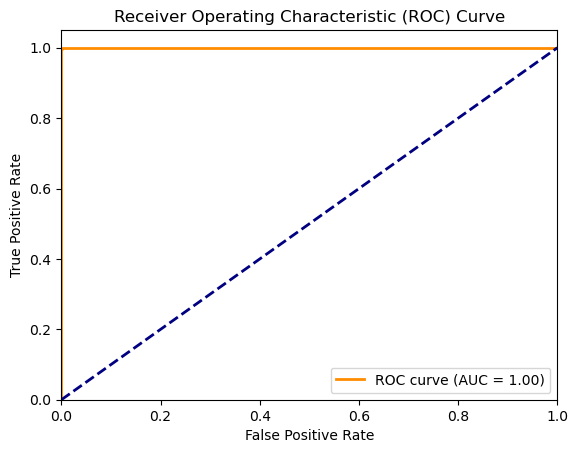

In [59]:
from sklearn.metrics import roc_curve, auc
# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [9]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_age_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "age"].mean()
mean_age_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "age"].mean()
mean_age_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "age"].mean()

# Print the mean age for each incl02 score
print("Mean age for incl02=0: {:.2f}".format(mean_age_0))
print("Mean age for incl02=1: {:.2f}".format(mean_age_1))
print("Mean age for incl02=2: {:.2f}".format(mean_age_2))

Mean age for incl02=0: 46.00
Mean age for incl02=1: 40.76
Mean age for incl02=2: 49.04


In [42]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_Latency_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "Latency [ms]"].mean()
mean_Latency_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "Latency [ms]"].mean()
mean_Latency_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "Latency [ms]"].mean()

# Print the mean age for each incl02 score
print("Mean Latency for Group 0 [ms]: {:.2f}".format(mean_Latency_0))
print("Mean Latency for Group 1 [ms]: {:.2f}".format(mean_Latency_1))
print("Mean Latency for Group 2 [ms]: {:.2f}".format(mean_Latency_2))

Mean Latency for Group 0 [ms]: 324.37
Mean Latency for Group 1 [ms]: 330.10
Mean Latency for Group 2 [ms]: 366.14


In [51]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_TMS_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "motorscore - Total motor score (TMS)"].mean()
mean_TMS_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "motorscore - Total motor score (TMS)"].mean()
mean_TMS_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "motorscore - Total motor score (TMS)"].mean()

# Print the mean age for each incl02 score
print("Mean TMS for Group 0 [ms]: {:.2f}".format(mean_TMS_0))
print("Mean TMS for Group 1 [ms]: {:.2f}".format(mean_TMS_1))
print("Mean TMS for Group 2 [ms]: {:.2f}".format(mean_TMS_2))

Mean TMS for Group 0 [ms]: 1.46
Mean TMS for Group 1 [ms]: 2.51
Mean TMS for Group 2 [ms]: 22.92


In [ ]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_TMS_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "functionalscore - Total functional capacity (TFC)"].mean()
mean_TMS_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "functionalscore - Total functional capacity (TFC)"].mean()
mean_TMS_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "functionalscore - Total functional capacity (TFC)"].mean()

# Print the mean age for each incl02 score
print("Mean TMS for Group 0 [ms]: {:.2f}".format(mean_TMS_0))
print("Mean TMS for Group 1 [ms]: {:.2f}".format(mean_TMS_1))
print("Mean TMS for Group 2 [ms]: {:.2f}".format(mean_TMS_2))

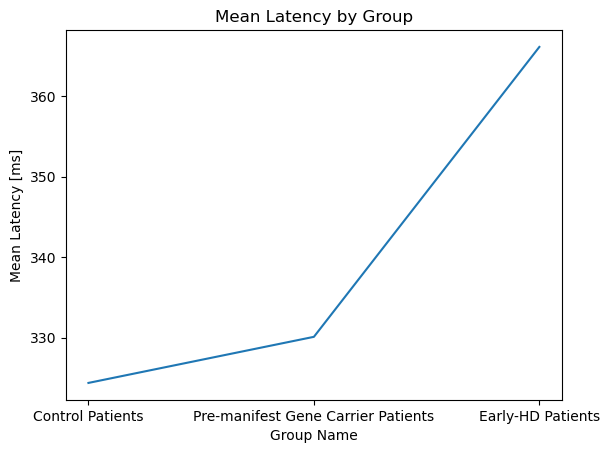

In [48]:
mean_latency = [mean_Latency_0, mean_Latency_1, mean_Latency_2]

# Create a list of group labels
group_labels = ['Control Patients', 'Pre-manifest Gene Carrier Patients', 'Early-HD Patients']

# Create a line plot
plt.plot(group_labels, mean_latency)

# Add labels and title
plt.xlabel('Group Name')
plt.ylabel('Mean Latency [ms]')
plt.title('Mean Latency by Group')

# Display the plot
plt.show()

In [38]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_rt_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "rt"].mean()
mean_rt_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "rt"].mean()
mean_rt_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "rt"].mean()

# Print the mean age for each incl02 score
print("Mean reaction time for Group 0 [ms]: {:.2f}".format(mean_rt_0))
print("Mean reaction time for Group 1 [ms]: {:.2f}".format(mean_rt_1))
print("Mean reaction time for Group 2 [ms]: {:.2f}".format(mean_rt_2))

Mean reaction time for Group 0 [ms]: 0.22
Mean reaction time for Group 1 [ms]: 0.21
Mean reaction time for Group 2 [ms]: 0.16


In [40]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_cag_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "caglarger_value (CAG length)"].mean()
mean_cag_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "caglarger_value (CAG length)"].mean()
mean_cag_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "caglarger_value (CAG length)"].mean()

# Print the mean age for each incl02 score
print("Mean cag value for Group 0: {:.2f}".format(mean_cag_0))
print("Mean cag value for Group 1: {:.2f}".format(mean_cag_1))
print("Mean cag value for Group 2: {:.2f}".format(mean_cag_2))

Mean cag value for Group 0: nan
Mean cag value for Group 1: 43.16
Mean cag value for Group 2: 43.57


In [9]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_duration_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "Duration [ms]"].mean()
mean_duration_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "Duration [ms]"].mean()
mean_duration_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "Duration [ms]"].mean()

# Print the mean age for each incl02 score
print("Mean duration value for Group 0: {:.2f}".format(mean_duration_0))
print("Mean duration value for Group 1: {:.2f}".format(mean_duration_1))
print("Mean duration value for Group 2: {:.2f}".format(mean_duration_2))

Mean duration value for Group 0: 51.86
Mean duration value for Group 1: 53.32
Mean duration value for Group 2: 58.46


In [10]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_amplitude_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "Amplitude [deg]"].mean()
mean_amplitude_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "Amplitude [deg]"].mean()
mean_amplitude_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "Amplitude [deg]"].mean()

# Print the mean age for each incl02 score
print("Mean amplitude value for Group 0: {:.2f}".format(mean_amplitude_0))
print("Mean amplitude value for Group 1: {:.2f}".format(mean_amplitude_1))
print("Mean amplitude value for Group 2: {:.2f}".format(mean_amplitude_2))

Mean amplitude value for Group 0: 10.74
Mean amplitude value for Group 1: 10.67
Mean amplitude value for Group 2: 10.11


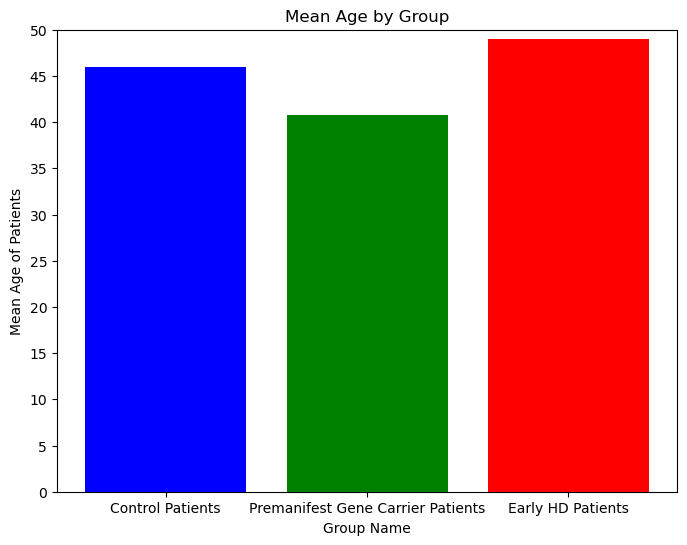

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('new1.csv')

# Filter the data by incl02 score
incl02_0 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 0]['age'].mean()
incl02_1 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 1]['age'].mean()
incl02_2 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 2]['age'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Control Patients', 'Premanifest Gene Carrier Patients', 'Early HD Patients'], [incl02_0, incl02_1, incl02_2], color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Group Name')
plt.ylabel('Mean Age of Patients')
plt.title('Mean Age by Group')

# Set the y-axis limits
plt.ylim(0, 50)
plt.yticks(range(0, 51, 5))



# Display the plot
plt.show()


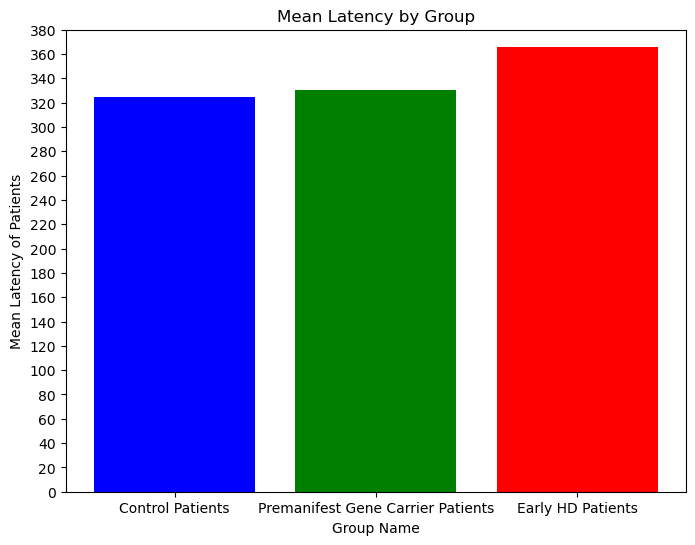

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('new1.csv')

# Filter the data by incl02 score
Latency_0 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 0]['Latency [ms]'].mean()
Latency_1 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 1]['Latency [ms]'].mean()
Latency_2 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 2]['Latency [ms]'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Control Patients', 'Premanifest Gene Carrier Patients', 'Early HD Patients'], [Latency_0, Latency_1, Latency_2], color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Group Name')
plt.ylabel('Mean Latency of Patients')
plt.title('Mean Latency by Group')

# Set the y-axis limits
plt.ylim(0, 50)
plt.yticks(range(0, 400, 20))



# Display the plot
plt.show()


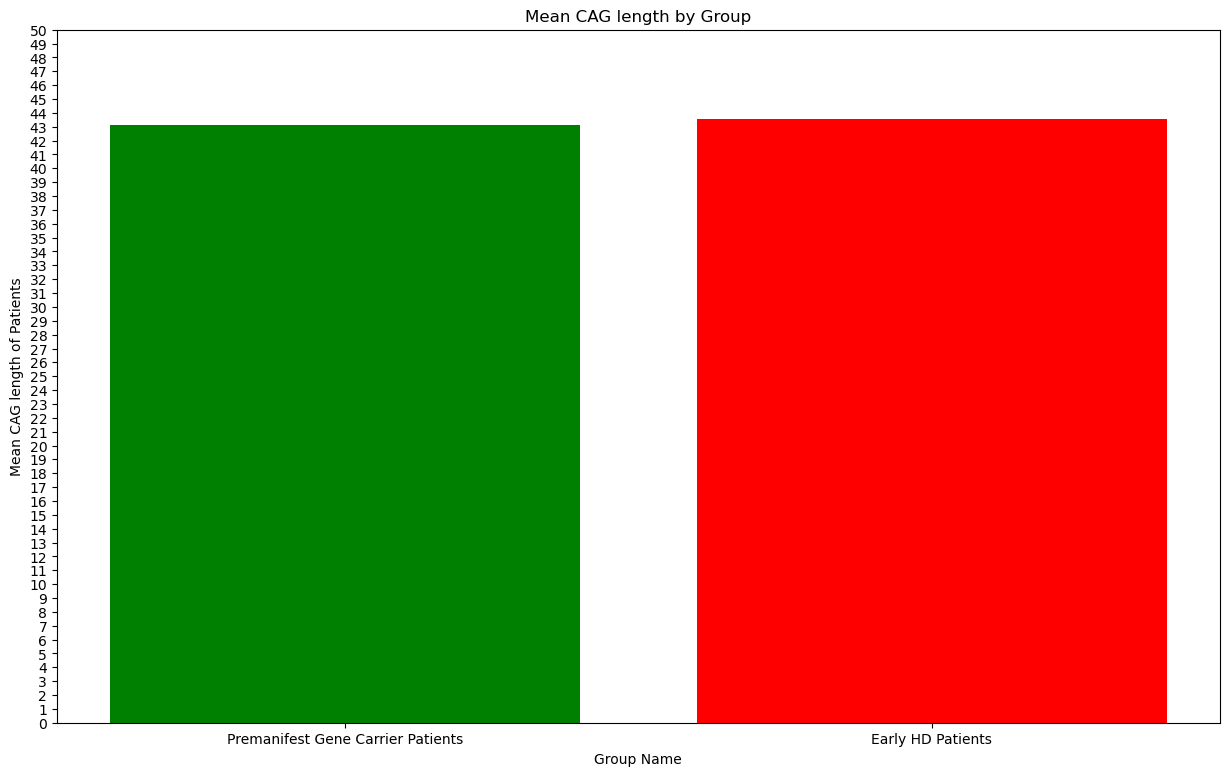

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('new1.csv')

# Filter the data by incl02 score
cag_0 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 0]['caglarger_value (CAG length)'].mean()
cag_1 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 1]['caglarger_value (CAG length)'].mean()
cag_2 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 2]['caglarger_value (CAG length)'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(15,9))
ax.bar(['Control Patients', 'Premanifest Gene Carrier Patients', 'Early HD Patients'], [cag_0, cag_1, cag_2], color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Group Name')
plt.ylabel('Mean CAG length of Patients')
plt.title('Mean CAG length by Group')

# Set the y-axis limits
plt.ylim(0, 50)
plt.yticks(range(0, 51, 1))



# Display the plot
plt.show()


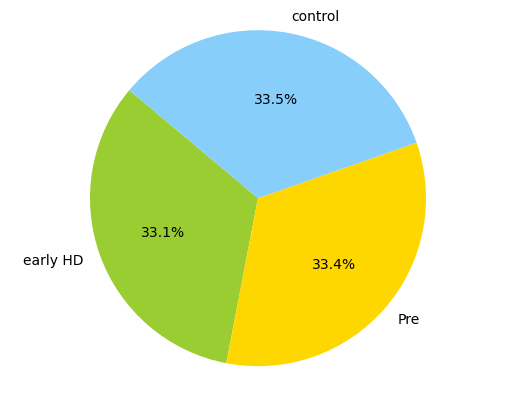

In [61]:
early_hd = df.loc[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 2]['subj_idx'].tolist()
premanifest_gene_carrier = df.loc[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 1]['subj_idx'].tolist()
control = df.loc[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 0]['subj_idx'].tolist()

labels = ['early HD', 'Pre', 'control']
sizes = [len(early_hd), len(premanifest_gene_carrier), len(control)]
colors = ['yellowgreen', 'gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

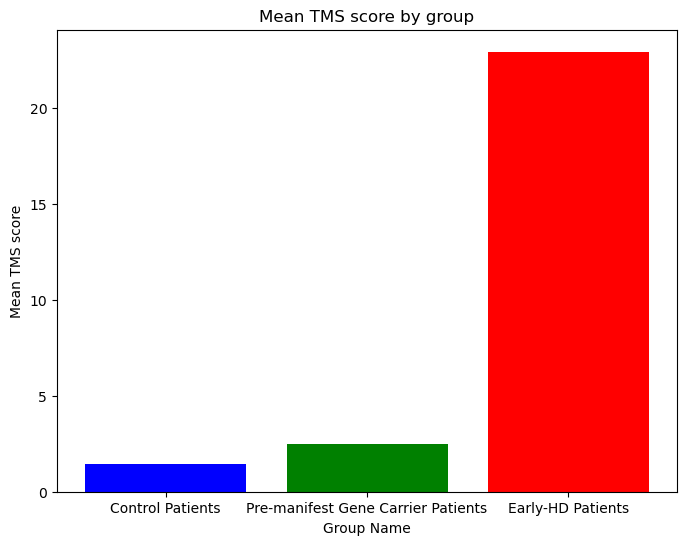

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean TMS score
mean_TMS_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "motorscore - Total motor score (TMS)"].mean()
mean_TMS_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "motorscore - Total motor score (TMS)"].mean()
mean_TMS_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "motorscore - Total motor score (TMS)"].mean()

# Create a list of group labels
group_labels = ['Control Patients', 'Pre-manifest Gene Carrier Patients', 'Early-HD Patients']

# Set the figure size
plt.figure(figsize=(8,6))

# Create a vertical bar plot
plt.bar(group_labels, [mean_TMS_0, mean_TMS_1, mean_TMS_2], color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Group Name')
plt.ylabel('Mean TMS score')
plt.title('Mean TMS score by group')

# Display the plot
plt.show()
